# segment dense microscopy images by simple filtering

In [1]:
import numpy as np
import os
import cv2
import re
import matplotlib.pyplot as plt

from areaparameters import AreaDetParams
from areadetection import AreaDetection
import areadetection

import plotutils as pu

In [82]:
basedir = '[PATH_TO_CONFLUENCY_DATA]'#'data/tumdilab/confluency/'
basedirexample = os.path.join(basedir,'3T3/pos0')




def getFiles(fpath):
    files = [f for f in os.listdir(fpath) if os.path.isfile(os.path.join(fpath,f)) and re.match(r'.*\.*(tif|png)$',f)]
    files.sort(key=lambda f: f.split()[0])
    return files

def denseForegroundDetPipeline(image):
    blur = cv2.GaussianBlur(image,(canny_blur_size,canny_blur_size),0)
    cedges = cv2.Canny(blur,lowThreshold,highThreshold)

    kernel = np.ones((dilateSize,dilateSize), np.uint8)

    img_dilation = cv2.dilate(cedges, kernel, iterations=1)

    kernel_erose = np.ones((erosionSize,erosionSize), np.uint8)
    img_erosion = cv2.erode(img_dilation, kernel_erose, iterations=erosioniteration)

    #use either this or postProcessMaskPipeline()
    #areadetection.fastFillHoles(img_erosion, minholes)
    #areadetection.fastFilterParticles(img_erosion, minparticles)
    adet = AreaDetection(params)
    img_erosion = adet.postProcessMaskPipeline(img_erosion)
    return img_erosion

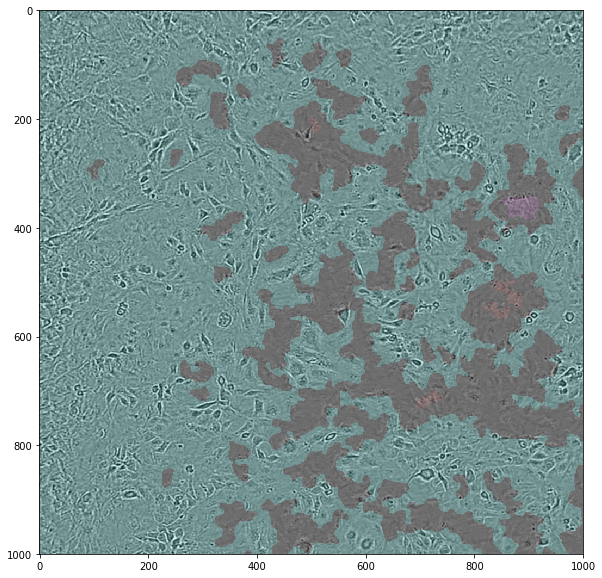

True

In [100]:
microfiles = getFiles(os.path.join(basedirexample,'micro'))
img = cv2.imread(os.path.join(basedirexample,'micro',microfiles[81]),0)


canny_blur_size = 5
lowThreshold = 15
canny_ratio = 3
highThreshold = lowThreshold*canny_ratio
#canny_kernel_size = 3
dilateSize = 4
erosionSize = 2
minholes = 400
minparticles = 400
params = AreaDetParams()
params.maxHoleSize = minholes
params.minParticleSize = minparticles
erosioniteration = 6

outmask = denseForegroundDetPipeline(img)


imgoverlay = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
transparancylevel = 0.15

output = pu.compOverlayImage(imgoverlay,outmask,transparancylevel)


plt.figure(figsize=(10,10))
plt.imshow(output[0:1000,0:1000,:])
plt.show()

cv2.imwrite('output.png',output)

# individual steps with image output

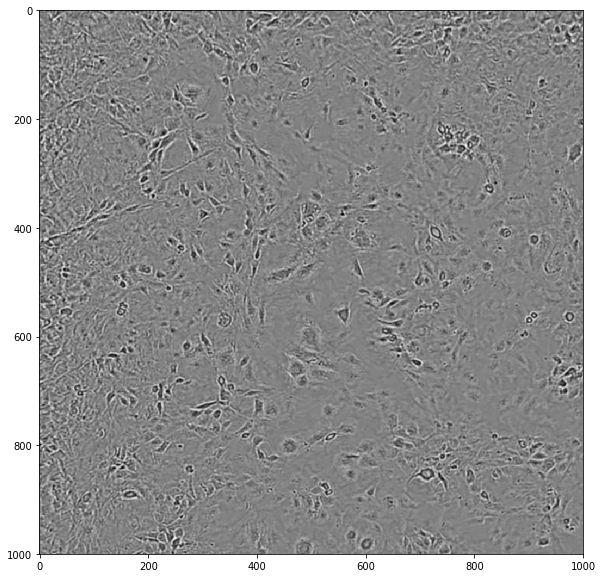

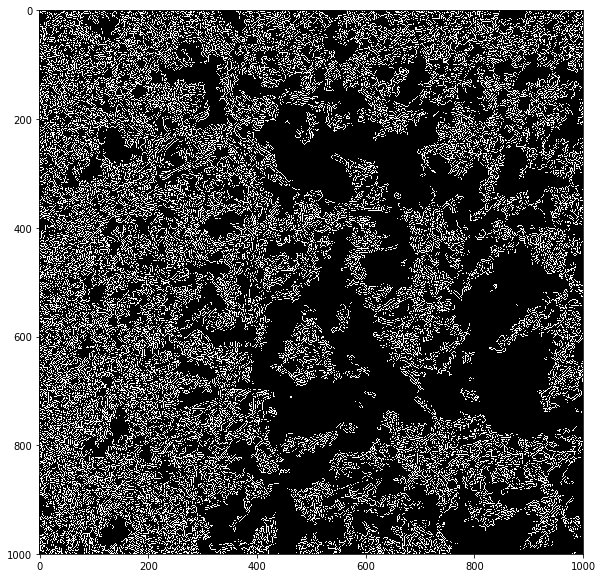

In [43]:
canny_blur_size = 5;
blur = cv2.GaussianBlur(img,(canny_blur_size,canny_blur_size),0)

plt.figure(figsize=(10,10))
plt.imshow(blur[0:1000,0:1000],cmap='gray')
plt.show()

lowThreshold = 18;
highThreshold = 200;
#canny_ratio = 3;
canny_kernel_size = 3;
#cedges = cv2.Canny(blur,lowThreshold, highThreshold, aperture_size=canny_kernel_size)
cedges = cv2.Canny(blur,lowThreshold,highThreshold)

plt.figure(figsize=(10,10))
plt.imshow(cedges[0:1000,0:1000],cmap='gray')
plt.show()

#blur(input, result, cv::Size(_blur_size, _blur_size));


#
# Canny( result, result, _lowThreshold, _lowThreshold*canny_ratio, _kernel_size)

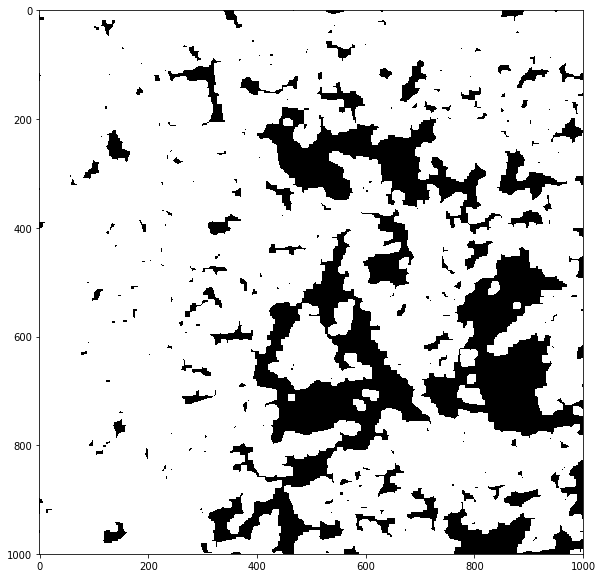

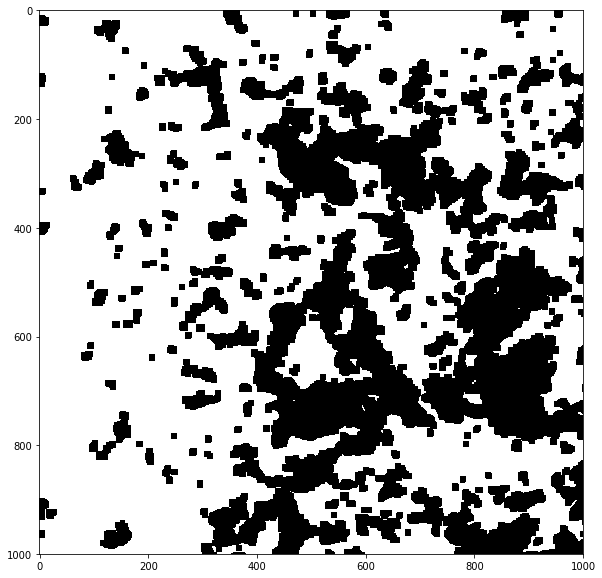

In [5]:
dilateSize = 10

kernel = np.ones((dilateSize,dilateSize), np.uint8)

#img_erosion = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(cedges, kernel, iterations=1)

plt.figure(figsize=(10,10))
plt.imshow(img_dilation[0:1000,0:1000],cmap='gray')
plt.show()

kernel_erose = np.ones((2,2), np.uint8)
img_erosion = cv2.erode(img_dilation, kernel_erose, iterations=10)
    
plt.figure(figsize=(10,10))
plt.imshow(img_erosion[0:1000,0:1000],cmap='gray')
plt.show()

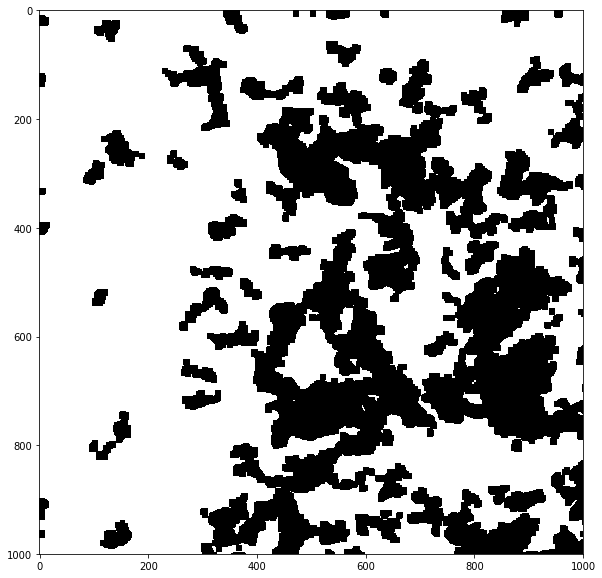

In [6]:
areadetection.fastFillHoles(img_erosion, 800)

plt.figure(figsize=(10,10))
plt.imshow(img_erosion[0:1000,0:1000],cmap='gray')
plt.show()

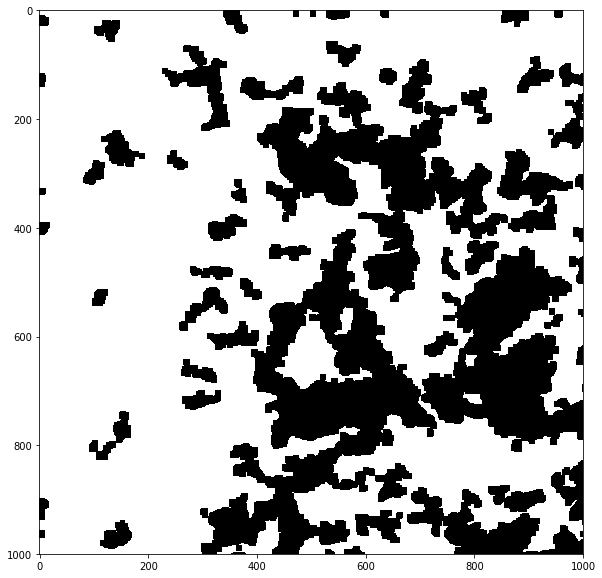

In [7]:
areadetection.fastFilterParticles(img_erosion, 200)

plt.figure(figsize=(10,10))
plt.imshow(img_erosion[0:1000,0:1000],cmap='gray')
plt.show()